# TFM
# Modelo Sarima

Realizado por: Luis Rendón  <br>
Fecha: DIC/2022

### Importación de librerias necesarias

In [11]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt



### Cargar el Dataset

In [2]:
# Specify the path to your Excel file
file_path = "https://github.com/huambra/Predicting-Shrimp-Exports/raw/refs/heads/main/Exports%20por%20Mercado.xlsx"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name="Unpivot")

# Display the first few rows of the dataframe
print(df.head())

                  Date  China   USA    UE
0  2012-12-01 00:00:00     19   291    75
1  2013-01-01 00:00:00    740  4119  4241
2  2013-02-01 00:00:00    380  5844  5407
3  2013-03-01 00:00:00    459  6929  7510
4  2013-04-01 00:00:00    403  7266  7830


In [9]:
df

,Date,China,USA,UE
0,2012-12-01 00:00:00,19,291,75
1,2013-01-01 00:00:00,740,4119,4241
2,2013-02-01 00:00:00,380,5844,5407
3,2013-03-01 00:00:00,459,6929,7510
4,2013-04-01 00:00:00,403,7266,7830
...,...,...,...,...
137,2024-05-01 00:00:00,68663,24101,18514
138,2024-06-01 00:00:00,60804,14983,17458
139,2024-07-01 00:00:00,49431,15963,20369
140,2024-08-01 00:00:00,57168,16503,17653


### Caracteristicas del Dataset (EDA)

In [12]:
# Mostrar información general del dataset
print("Información del dataset:")
print(df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    141 non-null    datetime64[ns]
 1   China   142 non-null    int64         
 2   USA     142 non-null    int64         
 3   UE      142 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.6 KB
None


El dataset cuenta con 142 entradas y 4 columnas, de las cuales la columna `Date` tiene un valor nulo que sería importante gestionar según el análisis requerido. Las columnas tienen tipos de datos adecuados para análisis: `Date` como `datetime64[ns]` para análisis temporales, y `China`, `USA`, y `UE` como `int64` para representar datos numéricos. Los nombres de las columnas son claros, pero podrían estandarizarse para facilitar el manejo automatizado del dataset. Además, es crucial verificar la consistencia de las filas para identificar posibles valores atípicos o inconsistencias, y asegurarse de que las fechas en la columna `Date` estén ordenadas cronológicamente antes de proceder con análisis de series temporales.

In [13]:
# Describir las estadísticas básicas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Estadísticas descriptivas:
                                Date         China           USA            UE
count                            141  1.420000e+02  1.420000e+02  1.420000e+02
mean   2018-10-01 02:22:58.723404288  4.531546e+04  2.137397e+04  2.089916e+04
min              2012-12-01 00:00:00  1.900000e+01  2.910000e+02  7.500000e+01
25%              2015-11-01 00:00:00  9.775000e+02  6.112500e+03  7.213000e+03
50%              2018-10-01 00:00:00  1.183450e+04  7.924500e+03  9.418000e+03
75%              2021-09-01 00:00:00  4.384900e+04  1.545400e+04  1.327975e+04
max              2024-08-01 00:00:00  3.217398e+06  1.517552e+06  1.483861e+06
std                              NaN  2.692758e+05  1.266093e+05  1.237263e+05

Valores nulos por columna:
Date     1
China    0
USA      0
UE       0
dtype: int64


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    142 non-null    object
 1   China   142 non-null    int64 
 2   USA     142 non-null    int64 
 3   UE      142 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.6+ KB
None

Estadísticas descriptivas:
              China           USA            UE
count  1.420000e+02  1.420000e+02  1.420000e+02
mean   4.531546e+04  2.137397e+04  2.089916e+04
std    2.692758e+05  1.266093e+05  1.237263e+05
min    1.900000e+01  2.910000e+02  7.500000e+01
25%    9.775000e+02  6.112500e+03  7.213000e+03
50%    1.183450e+04  7.924500e+03  9.418000e+03
75%    4.384900e+04  1.545400e+04  1.327975e+04
max    3.217398e+06  1.517552e+06  1.483861e+06

Valores nulos por columna:
Date     1
China    0
USA      0
UE       0
dtype: int64


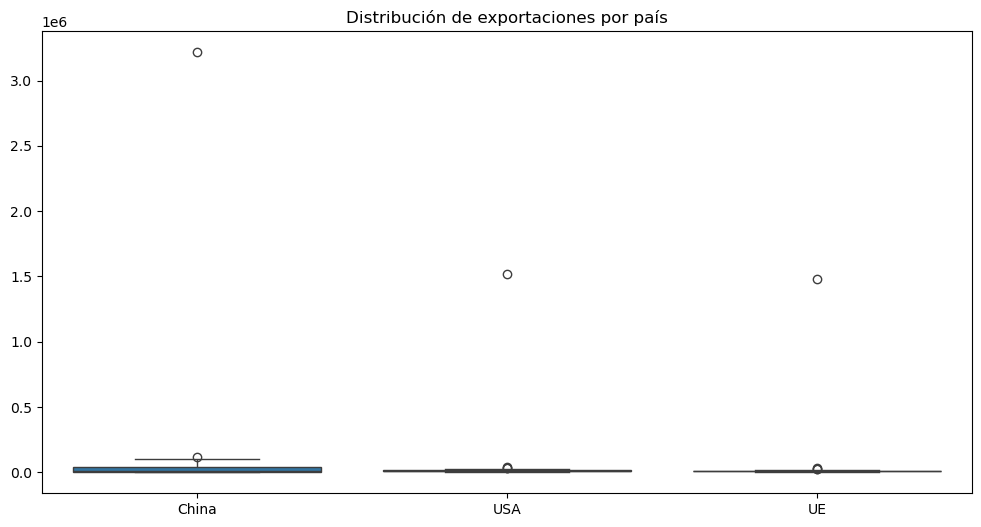

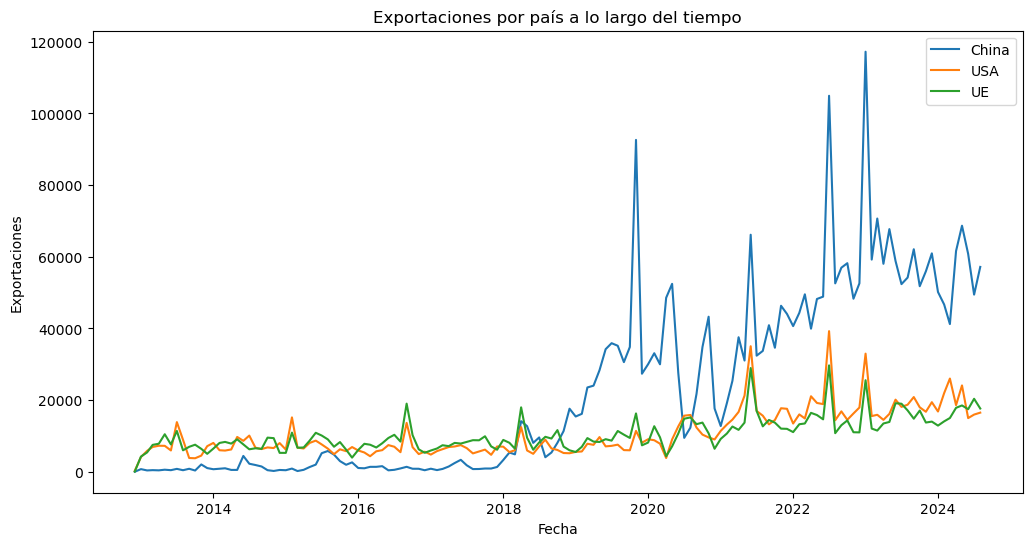

In [10]:




# Visualizar la distribución de los datos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['China', 'USA', 'UE']])
plt.title('Distribución de exportaciones por país')
plt.show()

# Visualizar las series temporales
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['China'], label='China')
plt.plot(df['Date'], df['USA'], label='USA')
plt.plot(df['Date'], df['UE'], label='UE')
plt.xlabel('Fecha')
plt.ylabel('Exportaciones')
plt.title('Exportaciones por país a lo largo del tiempo')
plt.legend()
plt.show()

### Preprocesamiento del Dataset
aqui hay que hacer hasta dividir los 3 datasets por pais listos para que se puedan modelar en cualquiera de lso 3 modelos. Para ciertos modelos peude haber mas preprocesamiento eso es cuestion de cada uno.

In [ ]:
# dividir el df por paises y establecer la fecha el indice

### División del Dataset en Datos de Entrenamiento y Datos de Testeo

In [ ]:
#dividir en entrenamiento
#dividir en test
# prueba dos

### Modelado de datos

In [ ]:
###prueba 3 jose xavier

### Evaluación de Modelo

### Fine-Tuning de Modelo

### Evaluación Final de Modelo

### Comparación del Desempeño de Modelos

In [ ]:
# 9 comparaciones 
# 3 paises y 3 modelos